In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [29]:
df = pd.read_csv("carPrices.csv")
print(df)
print(df.columns)

                Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5
Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')


### Call get_dummies function with drop_first="True" to automatically remove one of the dependent vartiable

In [14]:
dummyCar = pd.get_dummies(df['Car Model'], drop_first="True")
print(dummyCar)

    BMW X5  Mercedez Benz C class
0        1                      0
1        1                      0
2        1                      0
3        1                      0
4        1                      0
5        0                      0
6        0                      0
7        0                      0
8        0                      0
9        0                      1
10       0                      1
11       0                      1
12       0                      1


In [19]:
dfMerged = pd.concat([df, dummyCar], axis = 'columns')
print(dfMerged)

                Car Model  Mileage  Sell Price($)  Age(yrs)  BMW X5  \
0                  BMW X5    69000          18000         6       1   
1                  BMW X5    35000          34000         3       1   
2                  BMW X5    57000          26100         5       1   
3                  BMW X5    22500          40000         2       1   
4                  BMW X5    46000          31500         4       1   
5                 Audi A5    59000          29400         5       0   
6                 Audi A5    52000          32000         5       0   
7                 Audi A5    72000          19300         6       0   
8                 Audi A5    91000          12000         8       0   
9   Mercedez Benz C class    67000          22000         6       0   
10  Mercedez Benz C class    83000          20000         7       0   
11  Mercedez Benz C class    79000          21000         7       0   
12  Mercedez Benz C class    59000          33000         5       0   

    M

In [23]:
final = dfMerged.drop(dfMerged[['Car Model']], axis='columns')
print(final)

    Mileage  Sell Price($)  Age(yrs)  BMW X5  Mercedez Benz C class
0     69000          18000         6       1                      0
1     35000          34000         3       1                      0
2     57000          26100         5       1                      0
3     22500          40000         2       1                      0
4     46000          31500         4       1                      0
5     59000          29400         5       0                      0
6     52000          32000         5       0                      0
7     72000          19300         6       0                      0
8     91000          12000         8       0                      0
9     67000          22000         6       0                      1
10    83000          20000         7       0                      1
11    79000          21000         7       0                      1
12    59000          33000         5       0                      1


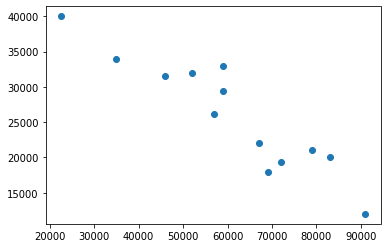

In [24]:
plt.scatter(final.Mileage, final['Sell Price($)'])

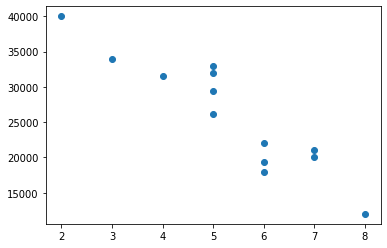

In [38]:
plt.scatter(final['Age(yrs)'], final['Sell Price($)'])

In [39]:
model = linear_model.LinearRegression()

In [45]:
X = final.drop(final[['Sell Price($)']], axis='columns')
y = final['Sell Price($)']

In [46]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
model.score(X,y)

0.9417050937281083

In [53]:
model.predict([[45000,4,0,1]])

array([36991.31721061])

In [52]:

model.predict([[86000,7,1,0]])

array([11080.74313219])